# Natural Language Processing

## data prep

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

we work with .tsv file 

In [5]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [6]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## cleaning the text

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000) :
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

## creating the bag of model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [12]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [14]:
len(x[0])

1500

## splitting into training and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## training the model (Naive Bayes)

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

## prediction and confusion matrix

In [20]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [41]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55 42]
 [12 91]]


0.73

Text(0.5, 1.0, 'The Confusion Matrix')

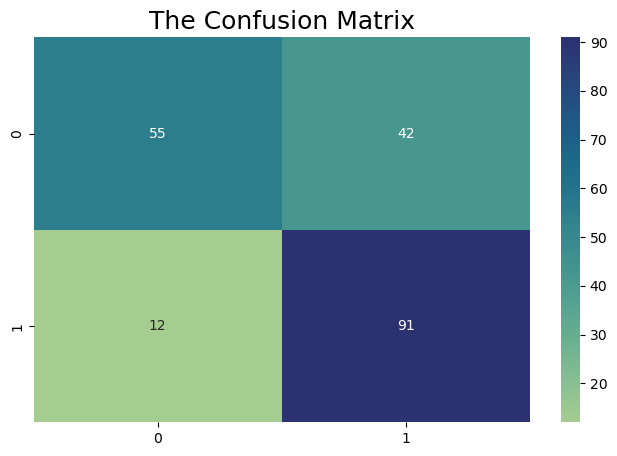

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,annot = True,fmt = '',cmap = 'crest')
plt.title('The Confusion Matrix', fontsize = 18)

---

## Personal Notes :

### penjelasan kode 

Kode ini digunakan untuk melakukan pra-pemrosesan teks pada sebuah dataset yang berisi ulasan (reviews). Berikut adalah penjelasan langkah demi langkah:

1. **Import Libraries**:
   ```python
   import re
   import nltk
   from nltk.corpus import stopwords
   from nltk.stem.porter import PorterStemmer
   ```
   - `re`: Digunakan untuk operasi berbasis ekspresi reguler, seperti pencarian dan penggantian pola dalam teks.
   - `nltk`: Library populer untuk pengolahan bahasa alami (NLP). 
   - `stopwords`: Digunakan untuk memuat daftar kata-kata umum dalam bahasa Inggris yang sering diabaikan dalam analisis teks.
   - `PorterStemmer`: Algoritma stemming yang mengubah kata-kata ke bentuk dasar atau akarnya.

2. **Download Stopwords**:
   ```python
   nltk.download('stopwords')
   ```
   - Ini memastikan bahwa daftar stopwords diunduh dan tersedia untuk digunakan.

3. **Inisialisasi Corpus**:
   ```python
   corpus = []
   ```
   - `corpus` adalah daftar kosong yang akan diisi dengan ulasan yang telah diproses.

4. **Pra-pemrosesan Setiap Review**:
   ```python
   for i in range(0,1000):
       review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
       review = review.lower()
       review = review.split()
       ps = PorterStemmer()
       all_stopwords = stopwords.words('english')
       all_stopwords.remove('not')
       review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
       review = ' '.join(review)
       corpus.append(review)
   ```
   - **Looping**: Melakukan iterasi sebanyak 1000 kali, satu kali untuk setiap review pada dataset.
   - **Pembersihan Teks**:
     - `re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])`: Menghapus semua karakter yang bukan huruf (misalnya, angka, tanda baca) dan menggantinya dengan spasi.
   - **Konversi ke Huruf Kecil**:
     - `review = review.lower()`: Mengubah semua huruf dalam review menjadi huruf kecil untuk konsistensi.
   - **Tokenisasi**:
     - `review = review.split()`: Memisahkan teks menjadi daftar kata-kata individual.
   - **Stemming**:
     - `ps = PorterStemmer()`: Membuat objek PorterStemmer untuk melakukan stemming.
     - `all_stopwords = stopwords.words('english')`: Memuat daftar stopwords.
     - `all_stopwords.remove('not')`: Menghapus kata 'not' dari daftar stopwords karena kata ini penting dalam konteks sentimen (misalnya, "not good" berbeda dengan "good").
     - `review = [ps.stem(word) for word in review if not word in set(all_stopwords)]`: Melakukan stemming pada setiap kata, sambil mengabaikan stopwords.
   - **Penggabungan Kembali Kata-Kata**:
     - `review = ' '.join(review)`: Menggabungkan kata-kata yang telah diproses menjadi satu string lagi.
   - **Menyimpan Hasil**:
     - `corpus.append(review)`: Menambahkan review yang telah diproses ke dalam `corpus`.

**Kesimpulan**: Setelah proses ini, `corpus` akan berisi 1000 ulasan yang sudah dibersihkan, diubah menjadi huruf kecil, bebas dari stopwords (kecuali "not"), dan telah distem ke bentuk dasar kata. Hasil ini siap untuk digunakan dalam analisis teks lebih lanjut, seperti pembuatan model pembelajaran mesin.